In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [4]:
!pip install ucimlrepo
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print("First 5 rows of features (X):\n", X.head())
print("\nFirst 5 rows of target (y):\n", y.head())
print("\nValue counts for 'Diagnosis' in y:\n", y['Diagnosis'].value_counts())

First 5 rows of features (X):
    radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavi

## Target Variable Distribution Plot

### Subtask:
Generate a bar plot to visualize the distribution of 'Malignant' vs 'Benign' diagnoses from the 'Diagnosis' column. This will show the class balance in the dataset. Ensure the plot has appropriate labels and a legend.


**Reasoning**:
To visualize the distribution of 'Malignant' vs 'Benign' diagnoses, I will import `matplotlib.pyplot` and `seaborn`, then use `seaborn.countplot` on the 'Diagnosis' column of the `y` DataFrame, and finally add appropriate labels and a title to the plot.



/tmp/ipython-input-317740728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=y, palette='viridis')


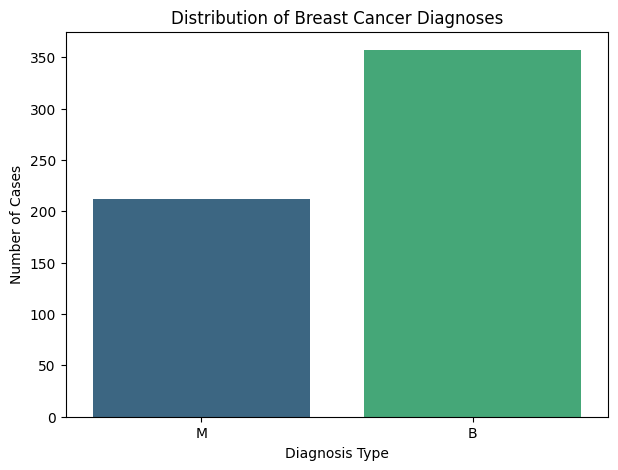

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts for 'Diagnosis'
diagnosis_counts = y['Diagnosis'].value_counts()

# Create the bar plot
#sns.countplot() : crée un diagramme en barres montrant le nombre d’échantillons pour chaque type de diagnostic (B ou M)
plt.figure(figsize=(7, 5))
sns.countplot(x='Diagnosis', data=y, palette='viridis')

# Add labels and title
#palette='viridis' : palette de couleurs utilisée pour rendre le graphique lisible et esthétique
plt.title('Distribution of Breast Cancer Diagnoses')
plt.xlabel('Diagnosis Type')
plt.ylabel('Number of Cases')

# Display the plot
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without specifying `hue` in `seaborn.countplot`. To address this and align with best practices for future versions, I will explicitly set `hue='Diagnosis'` and `legend=False` to ensure the correct coloring and remove the warning.



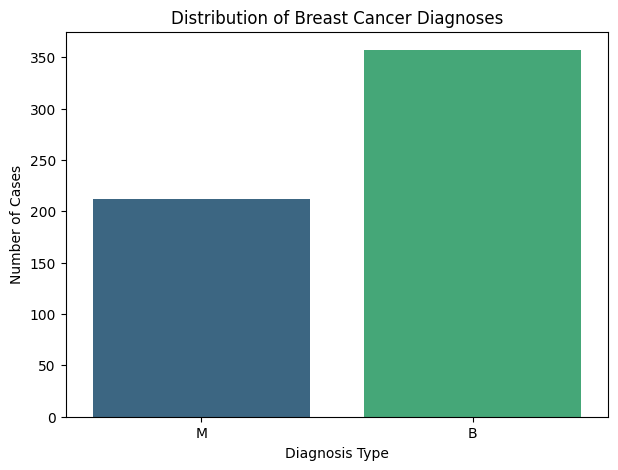

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.pyplot :  créer des graphiques et des figures
# Get value counts for 'Diagnosis'
diagnosis_counts = y['Diagnosis'].value_counts()

# Create the bar plot, addressing the FutureWarning
# sns.countplot() :trace un diagramme en barres
plt.figure(figsize=(7, 5))
sns.countplot(x='Diagnosis', data=y, hue='Diagnosis', palette='viridis', legend=False)

# Add labels and title
plt.title('Distribution of Breast Cancer Diagnoses')
plt.xlabel('Diagnosis Type')
plt.ylabel('Number of Cases')

# Display the plot
plt.show()
# M = Malignant (tumeur maligne)
# B = Benign (tumeur bénigne)

## Feature Distributions by Diagnosis

### Subtask:
Select key features such as 'radius1', 'texture1', and 'perimeter1' (representing the mean values for radius, texture, and perimeter) and create box plots for each of these features. Each box plot should be separated by the 'Diagnosis' (Malignant/Benign) to visualize how these features differ between the two groups. Ensure plots have titles, axis labels, and a clear legend.


**Reasoning**:
To create box plots that separate features by diagnosis, I need to combine the features DataFrame (X) and the target DataFrame (y) into a single DataFrame. This will allow Seaborn to easily plot the distributions of 'radius1', 'texture1', and 'perimeter1' against the 'Diagnosis' column.



In [8]:
df_combined = pd.concat([X, y], axis=1)

print("Combined DataFrame head:\n", df_combined.head())

Combined DataFrame head:
    radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  conc

**Reasoning**:
To visualize the distribution of 'radius1', 'texture1', and 'perimeter1' by 'Diagnosis', I will create box plots using the combined DataFrame. I will arrange these plots in a single figure for better comparison, ensuring each plot has a title, axis labels, and a clear legend.



/tmp/ipython-input-3525148260.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df_combined, palette={'M': 'salmon', 'B': 'lightgreen'})
/tmp/ipython-input-3525148260.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df_combined, palette={'M': 'salmon', 'B': 'lightgreen'})
/tmp/ipython-input-3525148260.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df_combined, palette={'M': 'salmon', 'B': 'lightgreen'})


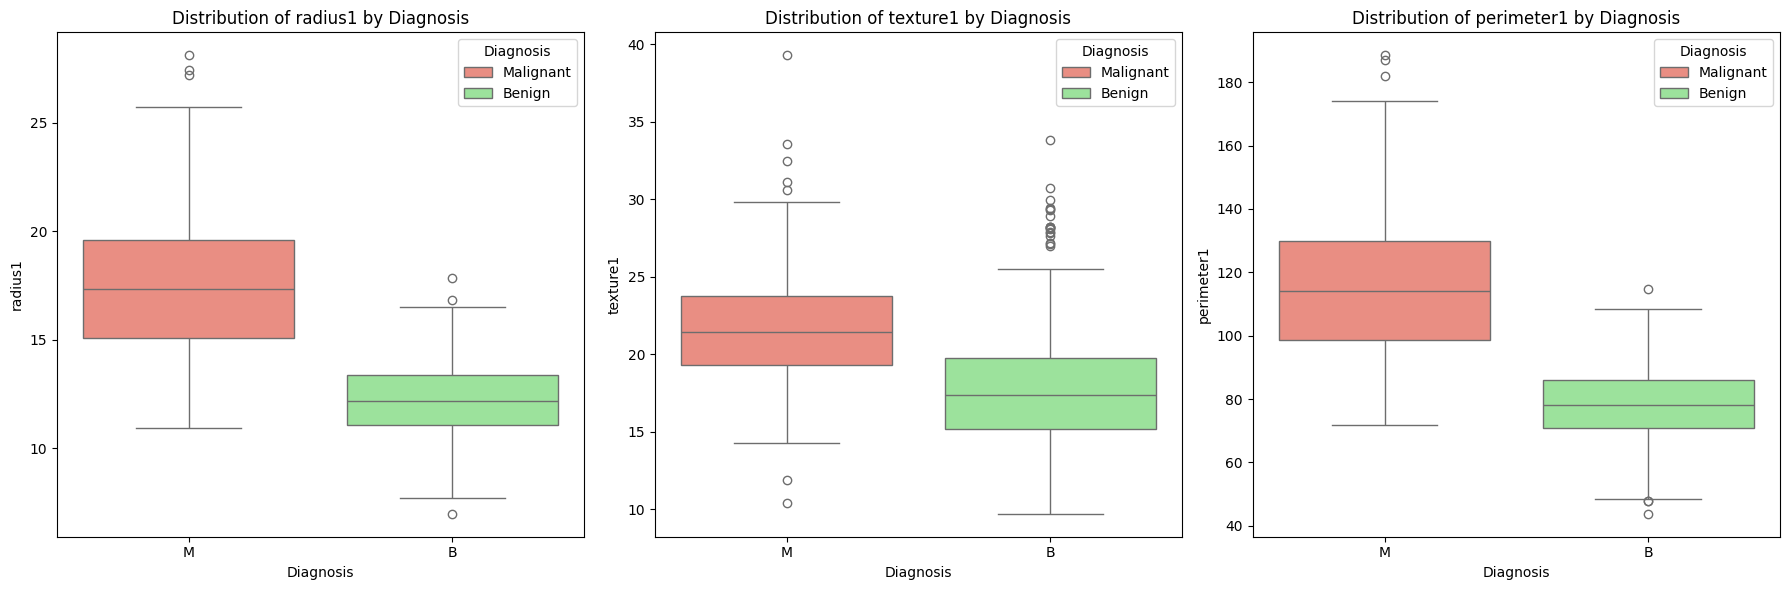

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features for plotting
features_to_plot = ['radius1', 'texture1', 'perimeter1']

# Create a figure with subplots for the box plots
plt.figure(figsize=(18, 6))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1) # 1 row, 3 columns, current plot index
    sns.boxplot(x='Diagnosis', y=feature, data=df_combined, palette={'M': 'salmon', 'B': 'lightgreen'})
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.legend(title='Diagnosis', loc='upper right', labels=['Malignant', 'Benign'])

plt.tight_layout()
plt.show()
#radius1 → rayon moyen des noyaux cellulaires,
#texture1 → variation de l’intensité de la texture,
#perimeter1 → périmètre du contour des noyaux.

**Reasoning**:
The previous code generated `FutureWarning` because `palette` was used without specifying `hue` in `seaborn.boxplot`. To resolve this and ensure a clear legend as requested, I will explicitly set `hue='Diagnosis'` in the `sns.boxplot` call, and remove the redundant `plt.legend()` call, allowing Seaborn to automatically generate the correct legend based on the `hue` variable and `palette` mapping.



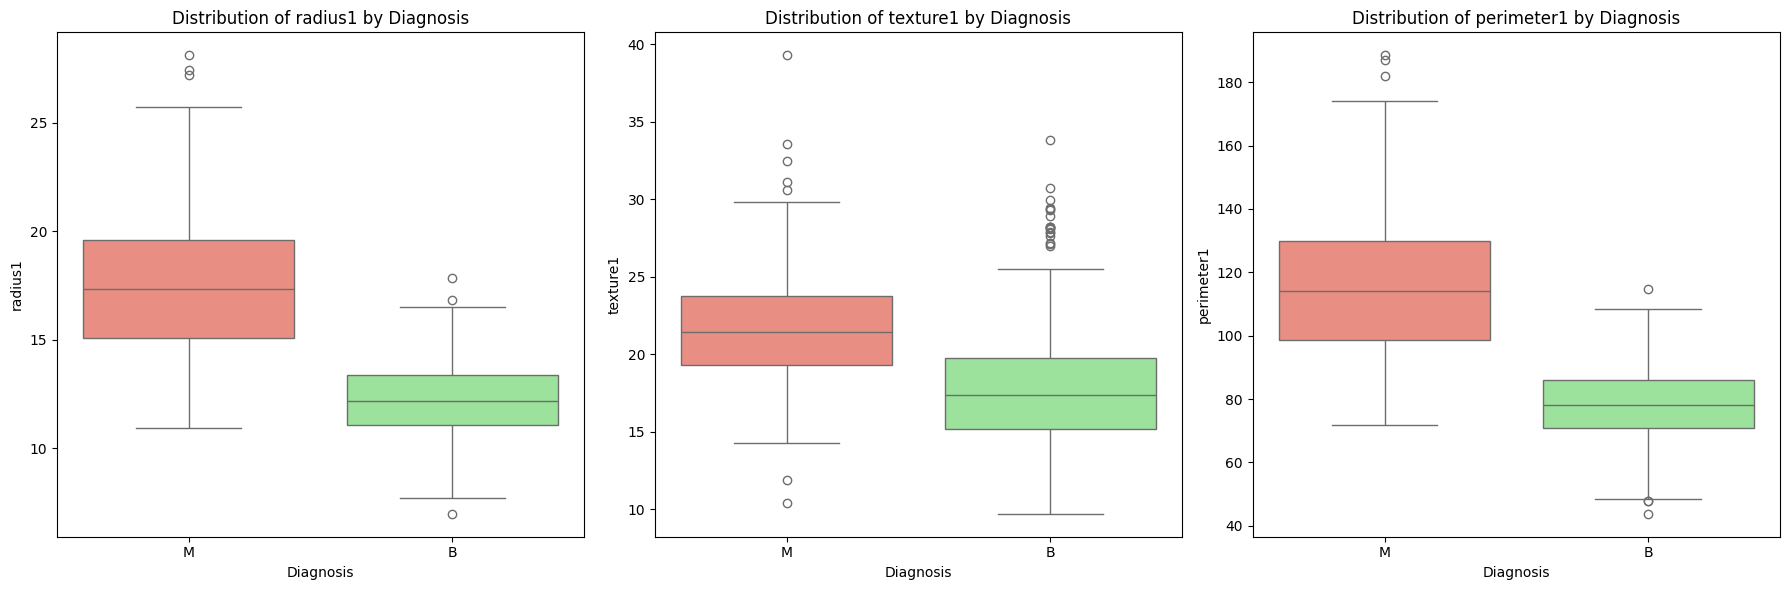

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features for plotting
features_to_plot = ['radius1', 'texture1', 'perimeter1']

# Create a figure with subplots for the box plots
plt.figure(figsize=(18, 6))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1) # 1 row, 3 columns, current plot index
    sns.boxplot(x='Diagnosis', y=feature, hue='Diagnosis', data=df_combined, palette={'M': 'salmon', 'B': 'lightgreen'})
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()